Parse numbers into matrix 26 x 26 where in colum is first char and row is the following one
so so N[1,2] => how many times 2 occurred after 1

In [106]:
names_file = open("./data/names.txt", "r")
names = names_file.read().split("\n")
import torch
import matplotlib.pyplot as plt
import numpy as np

In [107]:
FIRST_CHAR = '<S>'
LAST_CHAR = '<E>'

all_letters = set()
for name in names:
    for char in name:
        all_letters.add(char)

letter_to_int32 = {letter: index for index, letter in enumerate(all_letters)}
letter_to_int32[FIRST_CHAR] = len(letter_to_int32)
letter_to_int32[LAST_CHAR] = len(letter_to_int32)

In [108]:
letters_count = len(letter_to_int32)
N = torch.zeros((letters_count, letters_count))

for name in names:
    normalized_name = [FIRST_CHAR] + list(name) + [LAST_CHAR]
    for ch1, ch2 in zip(normalized_name, normalized_name[1:]):
        int_ch1 = letter_to_int32[ch1]
        int_ch2 = letter_to_int32[ch2]
        N[int_ch1,int_ch2] += 1

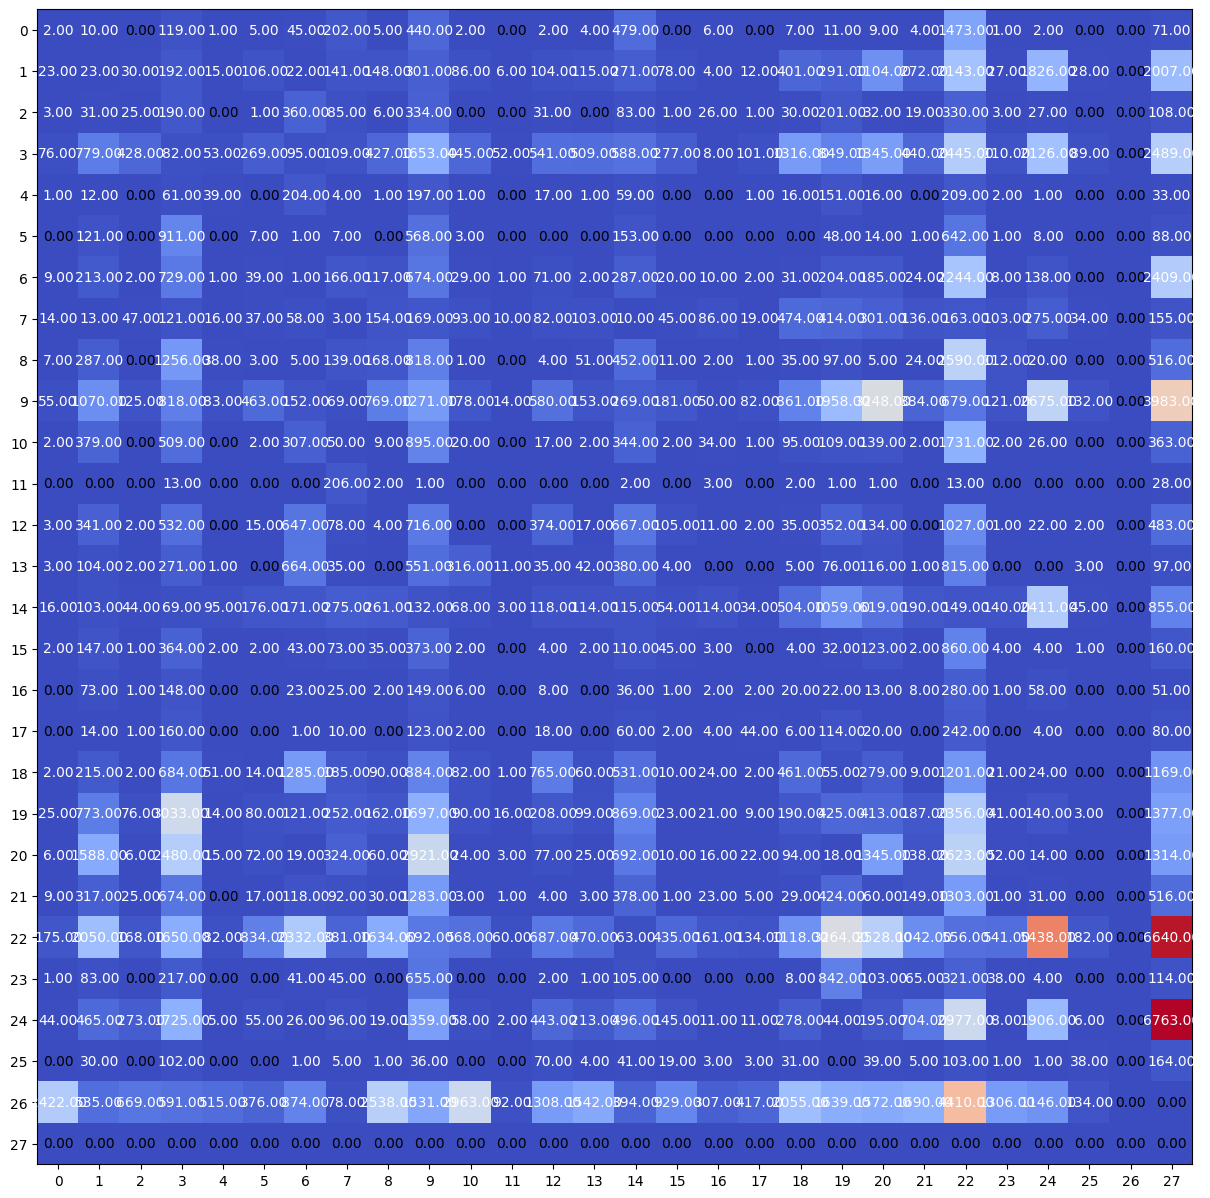

In [109]:
def visualize(N):
    fig, ax = plt.subplots(figsize=(15,15)) 
    plt.imshow(N, cmap='coolwarm', interpolation='nearest')
    ax.set_xticks(np.arange(N.shape[1]))
    ax.set_yticks(np.arange(N.shape[0]))

    for i in range(N.shape[0]):
        for j in range(N.shape[1]):
            ax.text(j, i, format(N[i, j].item(), '.2f'), 
                 horizontalalignment='center', 
                 verticalalignment='center',
                 color='white' if N[i, j] > 0.5 else 'black')

visualize(N)
plt.show()

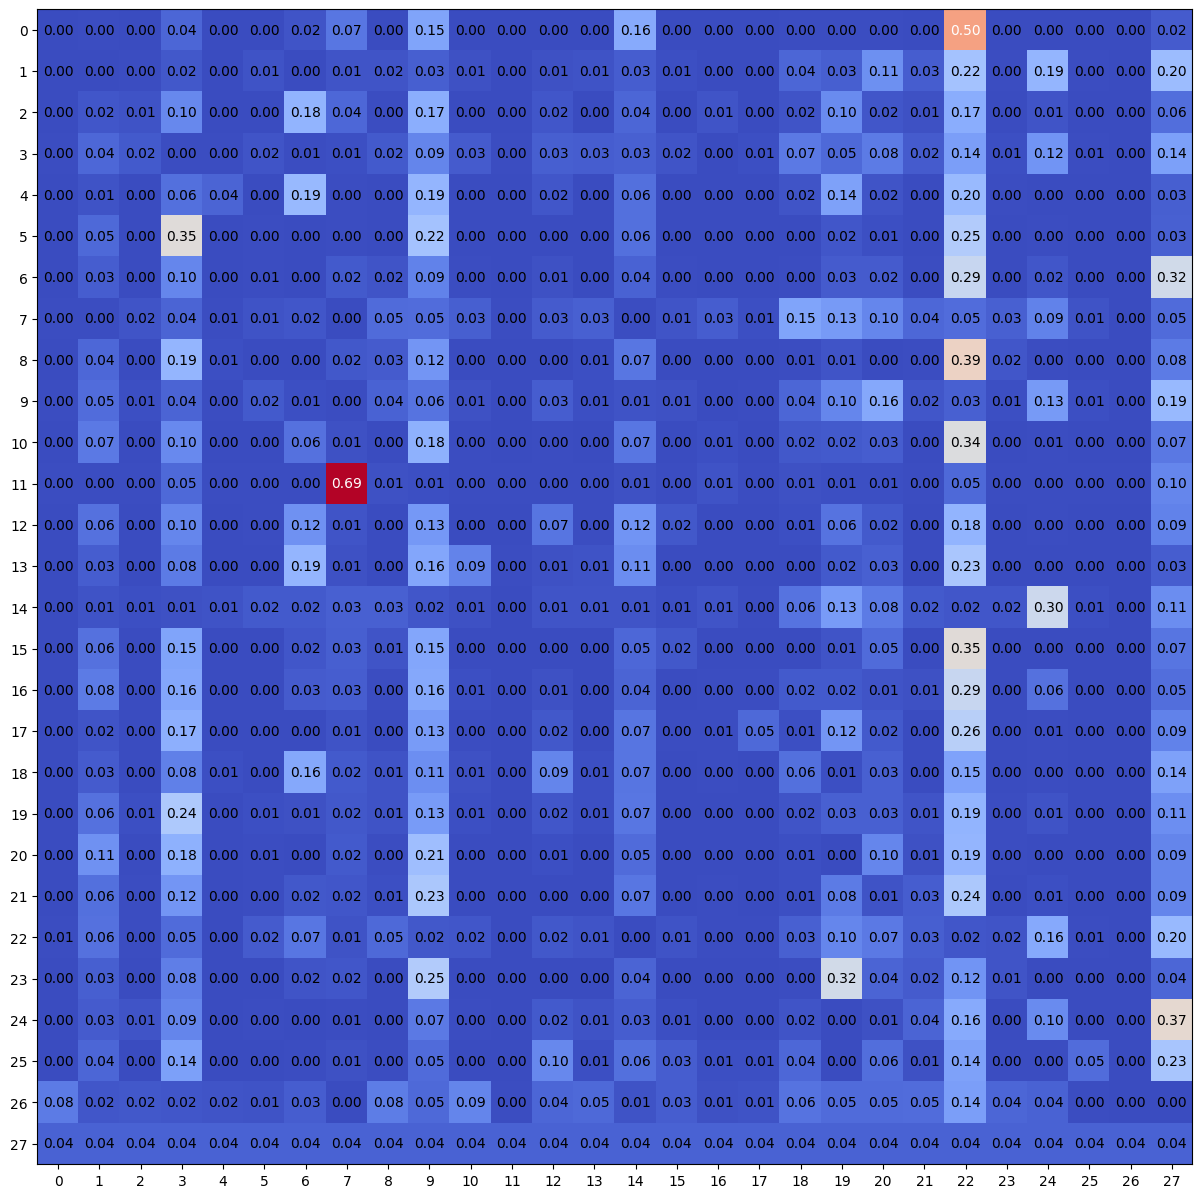

In [110]:
# regularize N to avoid situation where we have 0 prob that some bigram occurs after another one
N = N + 1
# normalize to probability row wise
P = N / N.sum(dim=1, keepdim=True)
visualize(P)

In [111]:
int32_to_letter = {value: key for key,value in letter_to_int32.items()}

In [112]:
def predict_next_letter_index(letter_index):
    return torch.multinomial(P[letter_index], num_samples=1).item()

def create_word():
    idx = 26
    word = []
    while True:
        idx = predict_next_letter_index(idx)
        word.append(int32_to_letter[idx])
        if idx == 27:
            return ''.join(word[:-1])

for _ in range(10):
    print(create_word())

than
cadaes
elenn
jhinttanylamannanan
anseeeiraneluarnjain
anion
ezaue
ann
veltedlli
strllonchahayba


In [119]:
# maximum likelihood mul(P[x][i]) => log sum(log(P[x][i])) => negative -sum(log(P[x][i]))
loss = 0
n = 0
for name in names:
    normalized_name = [FIRST_CHAR] + list(name) + [LAST_CHAR]
    for ch1, ch2 in zip(normalized_name, normalized_name[1:]):
        int_ch1 = letter_to_int32[ch1]
        int_ch2 = letter_to_int32[ch2]

        loss += torch.log(P[int_ch1, int_ch2])
        n += 1

-loss/n
    


tensor(2.4545)